In [4]:
import os
from dotenv import load_dotenv
load_dotenv()
import matplotlib.pyplot as plt
from logger import logger
import pandas as pd
from common_functions import NPCL,common
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)
# plt.figure(figsize=(18, 10))


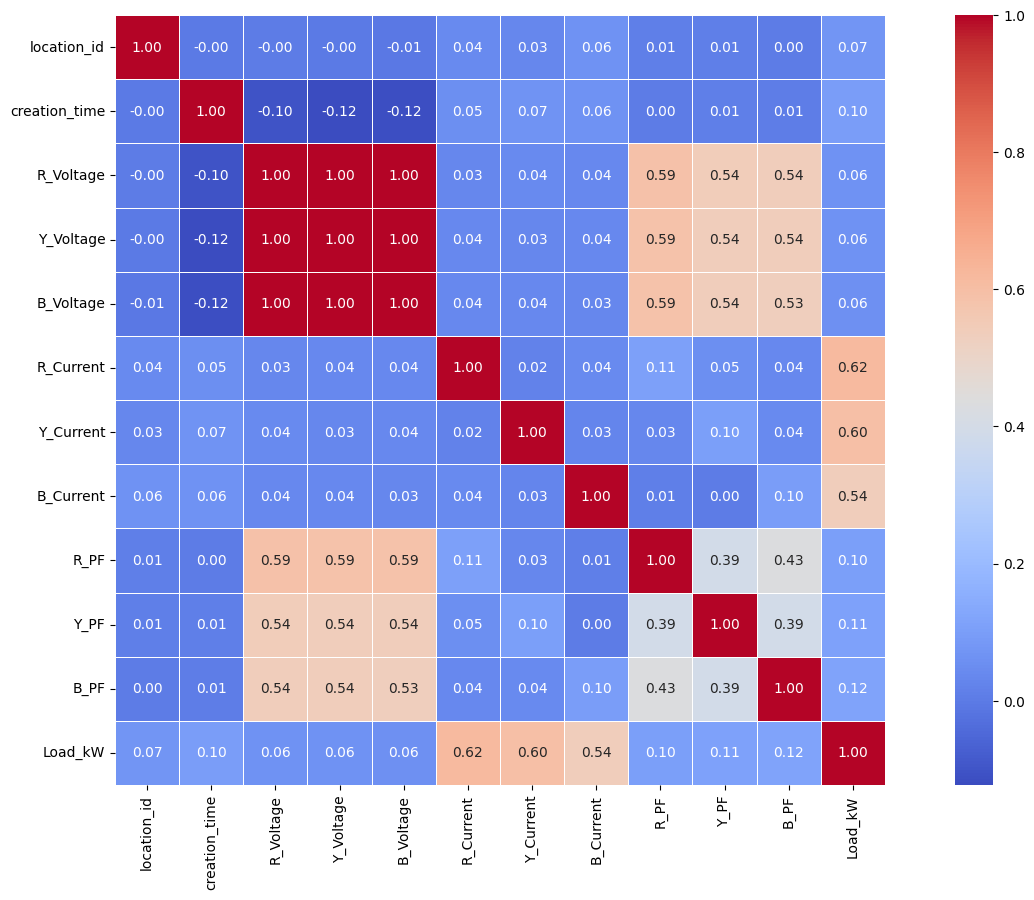

1938140


In [5]:
npcl_pipeline = NPCL()
common_pipeline = common()
df = npcl_pipeline.data_ingestion_npcl(data_path=os.getenv("data_path"))
data = npcl_pipeline.data_cleaning_and_validation(df)
common_pipeline.correlation_matrix(df=data)


In [6]:
data.set_index(['creation_time'],drop= True, inplace= True)
resample_df = data[['Load_kW']].resample(rule="h").mean()
resample_df

,Load_kW
creation_time,
2024-07-01 00:00:00,0.8709
2024-07-01 01:00:00,0.8313
2024-07-01 02:00:00,0.7231
2024-07-01 03:00:00,0.6937
2024-07-01 04:00:00,0.6398
...,...
2024-07-31 19:00:00,0.6751
2024-07-31 20:00:00,0.7478
2024-07-31 21:00:00,0.7547


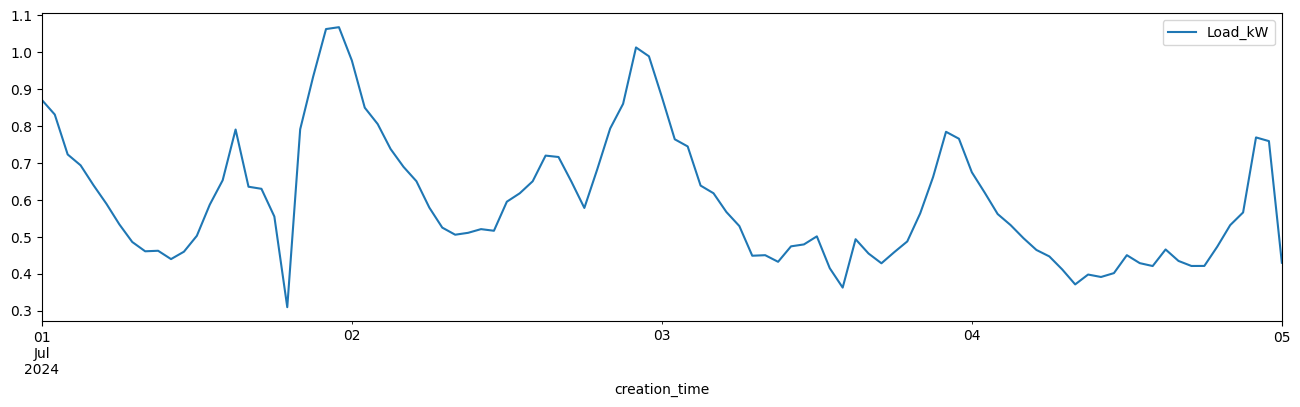

In [19]:
plt.figure(figsize=(16,4))
resample_df.loc[resample_df.index <="2024-07-05"].plot(ax=plt.gca())
plt.show()

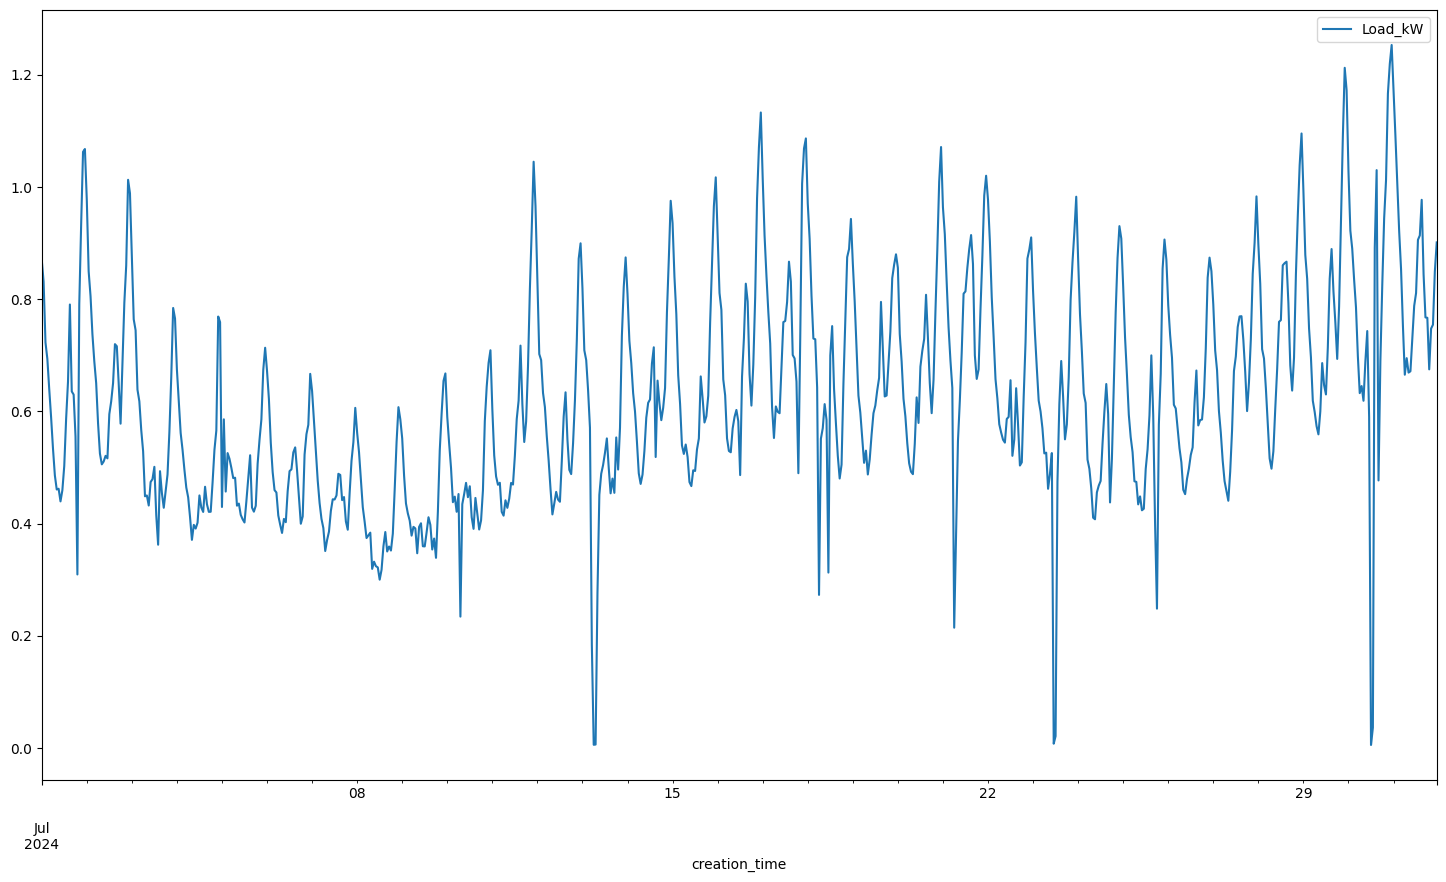

In [9]:
import matplotlib.pyplot as plt

# Plotting using pandas built-in plot function
plt.figure(figsize=(18, 10))
resample_df.plot(ax=plt.gca())  # This uses the current axes

plt.show()


from_date:  2024-07-01 to_date:  2024-07-31
holidays_lst: [datetime.date(2024, 7, 7), datetime.date(2024, 7, 14), datetime.date(2024, 7, 16), datetime.date(2024, 7, 21), datetime.date(2024, 7, 28)]


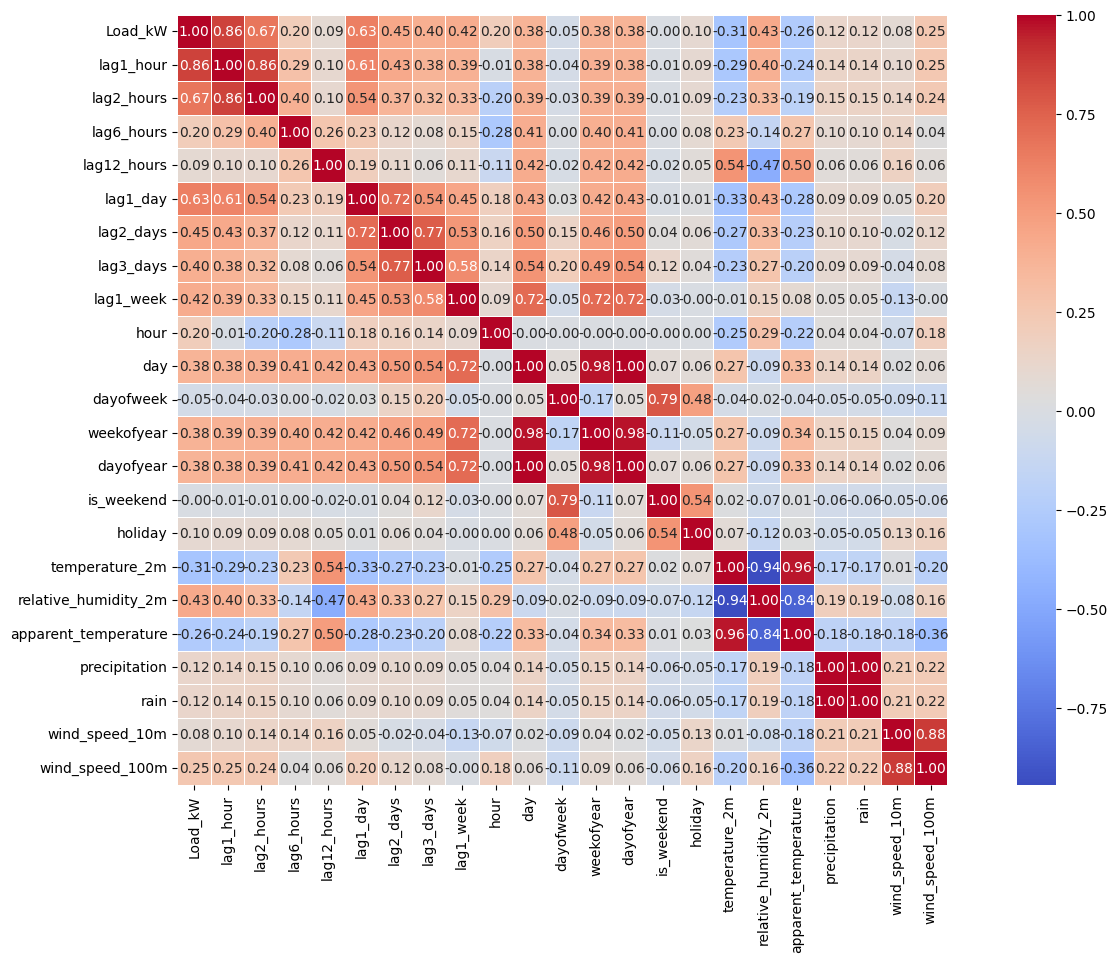

,Load_kW,lag1_hour,lag2_hours,lag6_hours,lag12_hours,lag1_day,lag2_days,lag3_days,lag1_week,hour,day,dayofweek,weekofyear,dayofyear,is_weekend,holiday,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,wind_speed_10m,wind_speed_100m
0,0.8709,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,27,183,0,0,25.3000,96,30.4000,3.9000,3.9000,9.8000,13.3000
1,0.8313,0.8709,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,1,0,27,183,0,0,27.9000,89,34.9000,0.0000,0.0000,2.3000,2.3000
2,0.7231,0.8313,0.8709,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2,1,0,27,183,0,0,28.7000,84,35.0000,0.0000,0.0000,6.4000,8.0000
3,0.6937,0.7231,0.8313,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3,1,0,27,183,0,0,29.9000,77,35.7000,0.0000,0.0000,8.4000,10.7000
4,0.6398,0.6937,0.7231,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4,1,0,27,183,0,0,31.1000,73,37.1000,0.0000,0.0000,8.2000,10.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,0.6751,0.7670,0.7677,0.9060,0.6950,0.9444,0.7872,0.6961,0.6452,19,31,2,31,213,0,0,26.7000,96,31.3000,25.1000,25.1000,19.3000,31.0000
740,0.7478,0.6751,0.7670,0.9138,0.6693,1.0124,0.9418,0.8442,0.7761,20,31,2,31,213,0,0,26.8000,96,32.7000,15.3000,15.3000,10.8000,18.8000
741,0.7547,0.7478,0.6751,0.9773,0.6716,1.1667,1.0898,0.9482,0.8738,21,31,2,31,213,0,0,26.8000,97,33.3000,6.0000,6.0000,7.8000,13.1000
742,0.8495,0.7547,0.7478,0.8446,0.7297,1.2193,1.2127,1.0392,0.9304,22,31,2,31,213,0,0,26.7000,97,32.6000,3.9000,3.9000,11.2000,17.7000


In [20]:
latitude, longitude = "28.625361","77.376214"#, 28.628059,77.378912
from_date = resample_df.first_valid_index().date()
to_date = resample_df.last_valid_index().date()
print("from_date: ",from_date,"to_date: ",to_date)
weather_df = npcl_pipeline.weather_data_api(latitude,longitude,from_date,to_date)

holidays_lst= common_pipeline.holidays_list(from_date,to_date)
print("holidays_lst:",holidays_lst)

df_lags = common_pipeline.add_lags(resample_df,target_col="Load_kW")
df2 = common_pipeline.create_features(df_lags)
for date in holidays_lst:
    df2.loc[f"{date}", 'holiday'] = 1
df2.fillna(0,inplace= True)
df3 = df2.merge(weather_df,on=["creation_time"])
df3.drop(['creation_time'],axis=1,inplace=True)
common_pipeline.correlation_matrix(df3)
df3

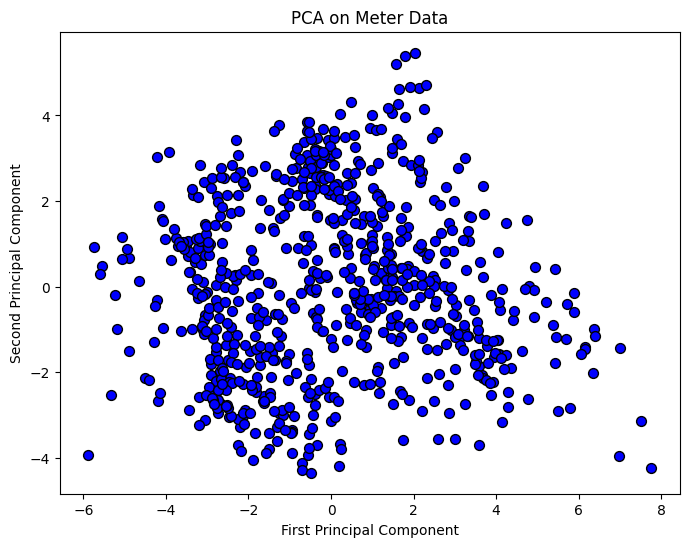

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-5.8925,-3.9293,-1.9676,-0.6047,1.5551,0.1845,-0.9998,-2.5183,-1.6436,-0.3210,1.0404,0.1492
1,-5.3211,-2.5376,-0.0288,-2.2133,-0.0520,-1.7937,0.9880,-2.5343,-2.4918,-0.1475,-0.1368,-0.2114
2,-4.1980,-2.6780,-1.0601,-1.0779,-1.7055,-2.1582,0.5804,-2.8093,-3.1163,-0.5773,-0.7671,-0.4032
3,-4.5049,-2.1473,-1.4540,-0.6515,-1.6356,-1.4237,0.4015,-2.7580,-3.0393,-0.4917,-1.0784,-0.1460
4,-4.8919,-1.5141,-1.4161,-0.6994,-1.3210,-1.1594,0.4972,-2.6649,-2.9315,-0.3153,-1.2873,0.0452
...,...,...,...,...,...,...,...,...,...,...,...,...
739,5.7899,-2.8328,-7.0031,3.6211,5.0667,-0.2589,-0.2522,-0.0741,1.0739,-0.1215,0.1477,0.6589
740,5.4333,-1.7980,-3.2711,0.8323,3.7120,-0.3783,-0.0945,0.2995,1.4362,0.3238,0.3349,0.2978
741,5.4402,-1.1795,-0.6263,-0.8882,1.8220,0.3869,-0.3012,0.7743,2.0342,0.5156,0.5078,0.3202
742,6.0526,-1.5729,-0.6118,-0.5777,0.9932,1.6794,-0.4604,1.0570,1.4161,0.3044,0.3442,0.3663


In [21]:
pca_df ,pca_result = common_pipeline.pca_function(df3)
common_pipeline.pca_plot(pca_result)
pca_df

## scalling

In [27]:
import numpy as np

df4 = df3.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_normalize = ['lag1_hour', 'lag2_hours', 'lag6_hours', 'lag12_hours','lag1_day', 'lag2_days', 'lag3_days', 'lag1_week', 'hour', 'day','dayofweek', 'weekofyear', 'dayofyear', 'is_weekend', 'holiday','temperature_2m', 'relative_humidity_2m', 'apparent_temperature','precipitation', 'rain', 'wind_speed_10m', 'wind_speed_100m']

df4[features_to_normalize] = scaler.fit_transform(df4[features_to_normalize])

df4['hour_sin'] = np.sin(2 * np.pi * df4['hour'] / 24)
df4['hour_cos'] = np.cos(2 * np.pi * df4['hour'] / 24)
df4['day_sin'] = np.sin(2 * np.pi * df4['day'] / 31)  # Assuming day is between 1-31
df4['day_cos'] = np.cos(2 * np.pi * df4['day'] / 31)
df4

,Load_kW,lag1_hour,lag2_hours,lag6_hours,lag12_hours,lag1_day,lag2_days,lag3_days,lag1_week,hour,day,dayofweek,weekofyear,dayofyear,is_weekend,holiday,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,wind_speed_10m,wind_speed_100m,hour_sin,hour_cos,day_sin,day_cos
0,0.8709,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9318,0.0265,0.0658,0.0658,0.3891,0.3486,0.0000,1.0000,0.0000,1.0000
1,0.8313,0.6949,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0435,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2321,0.7727,0.3245,0.0000,0.0000,0.0753,0.0514,0.0114,0.9999,0.0000,1.0000
2,0.7231,0.6633,0.6949,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0870,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3036,0.6591,0.3311,0.0000,0.0000,0.2469,0.2054,0.0228,0.9997,0.0000,1.0000
3,0.6937,0.5770,0.6633,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1304,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4107,0.5000,0.3775,0.0000,0.0000,0.3305,0.2784,0.0341,0.9994,0.0000,1.0000
4,0.6398,0.5535,0.5770,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1739,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5179,0.4091,0.4702,0.0000,0.0000,0.3222,0.2649,0.0455,0.9990,0.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,0.6751,0.6120,0.6125,0.7228,0.5546,0.7535,0.6492,0.6144,0.5695,0.8261,1.0000,0.3333,1.0000,1.0000,0.0000,0.0000,0.1250,0.9318,0.0861,0.4233,0.4233,0.7866,0.8270,0.2146,0.9767,0.2013,0.9795
740,0.7478,0.5386,0.6120,0.7291,0.5340,0.8077,0.7767,0.7451,0.6850,0.8696,1.0000,0.3333,1.0000,1.0000,0.0000,0.0000,0.1339,0.9318,0.1788,0.2580,0.2580,0.4310,0.4973,0.2257,0.9742,0.2013,0.9795
741,0.7547,0.5966,0.5386,0.7798,0.5359,0.9308,0.8987,0.8369,0.7712,0.9130,1.0000,0.3333,1.0000,1.0000,0.0000,0.0000,0.1339,0.9545,0.2185,0.1012,0.1012,0.3054,0.3432,0.2368,0.9716,0.2013,0.9795
742,0.8495,0.6022,0.5966,0.6739,0.5822,0.9729,1.0000,0.9172,0.8212,0.9565,1.0000,0.3333,1.0000,1.0000,0.0000,0.0000,0.1250,0.9545,0.1722,0.0658,0.0658,0.4477,0.4676,0.2478,0.9688,0.2013,0.9795


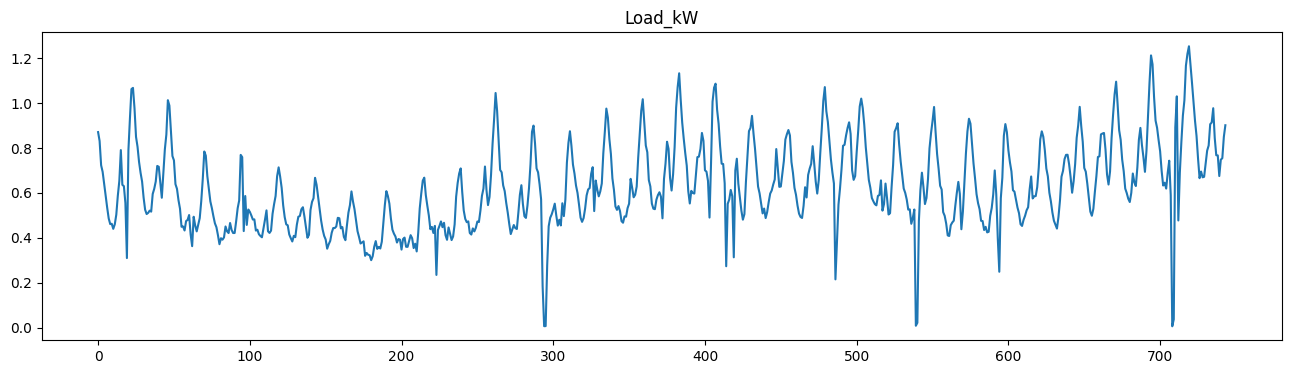

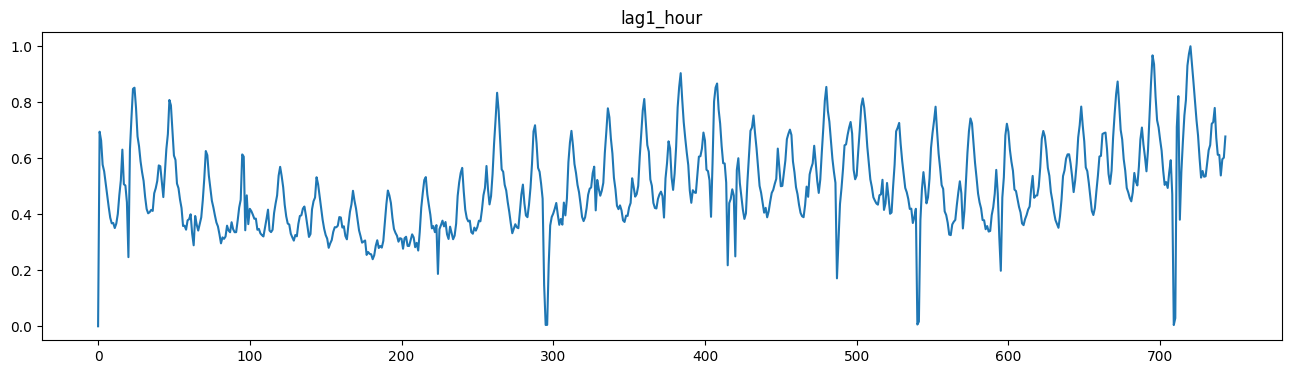

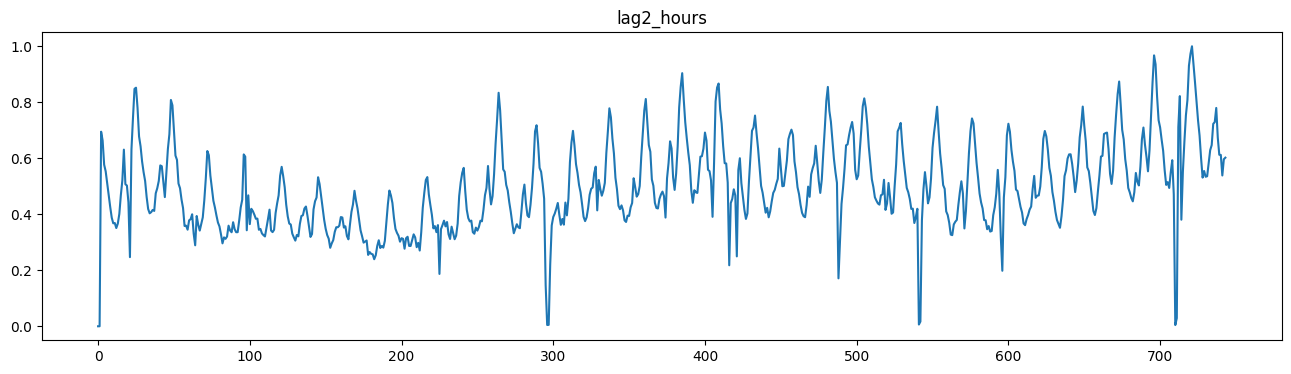

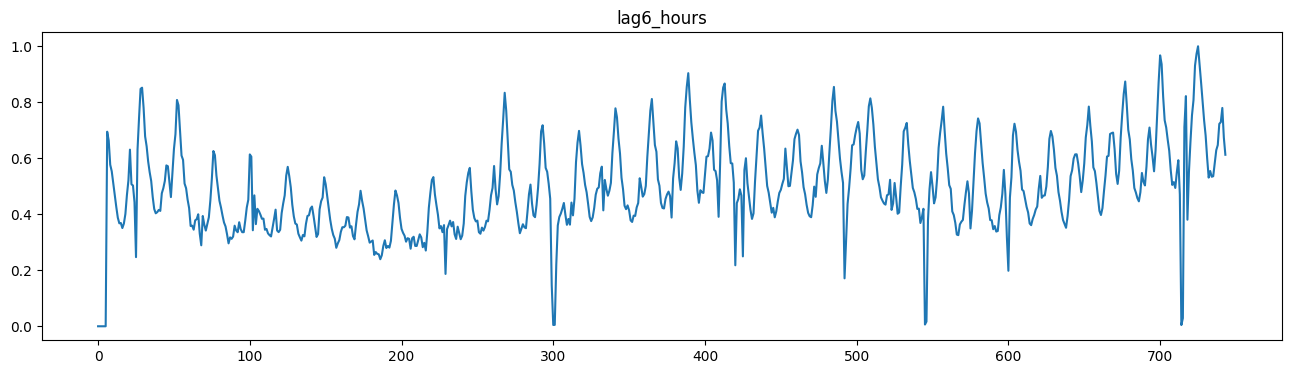

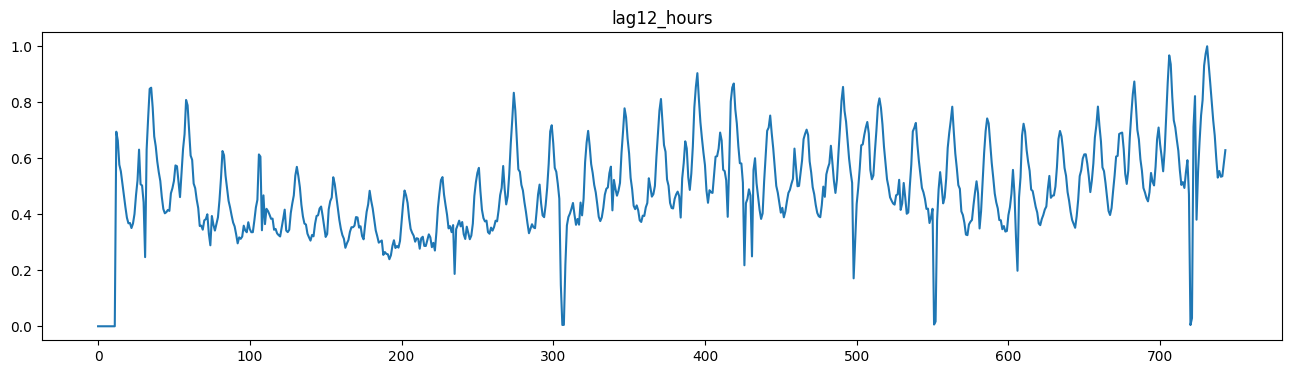

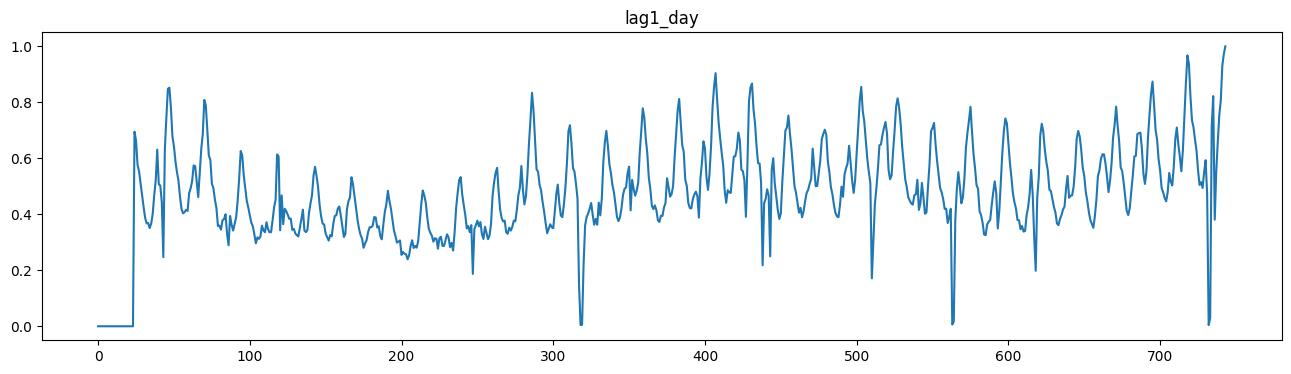

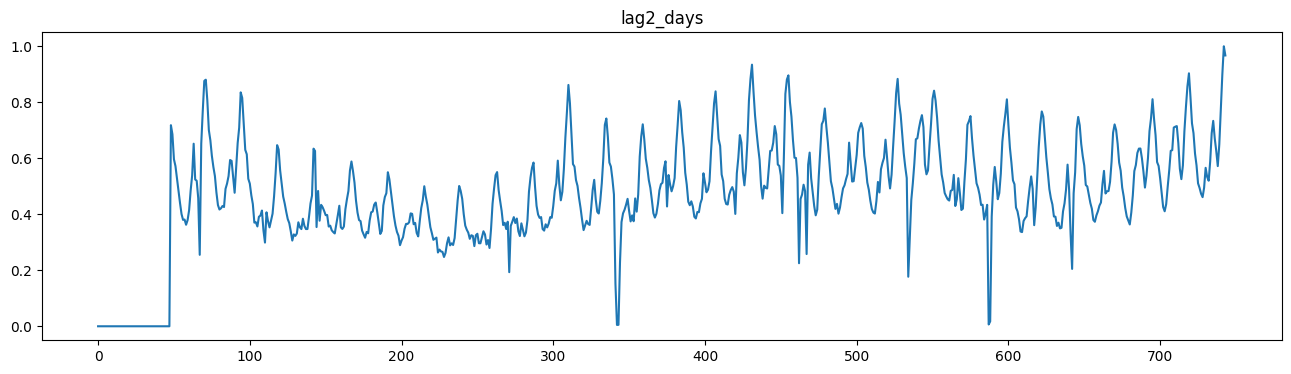

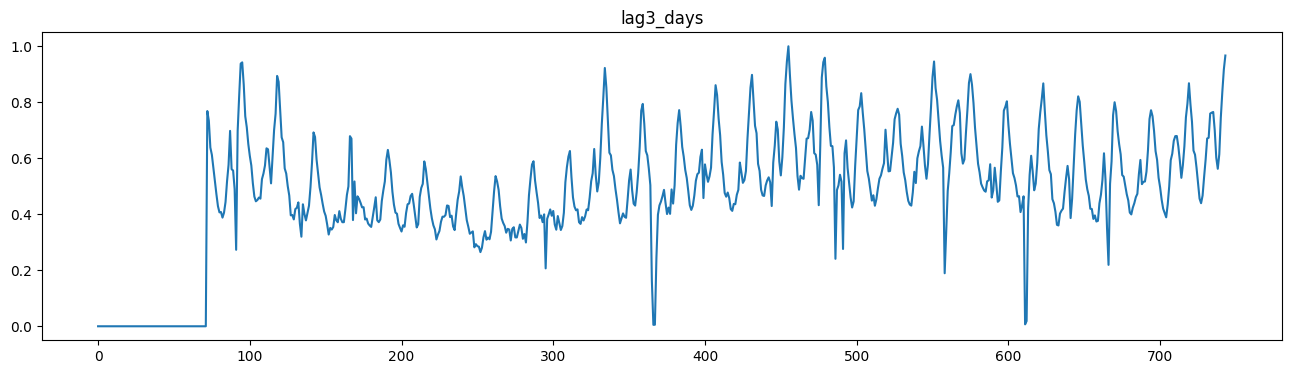

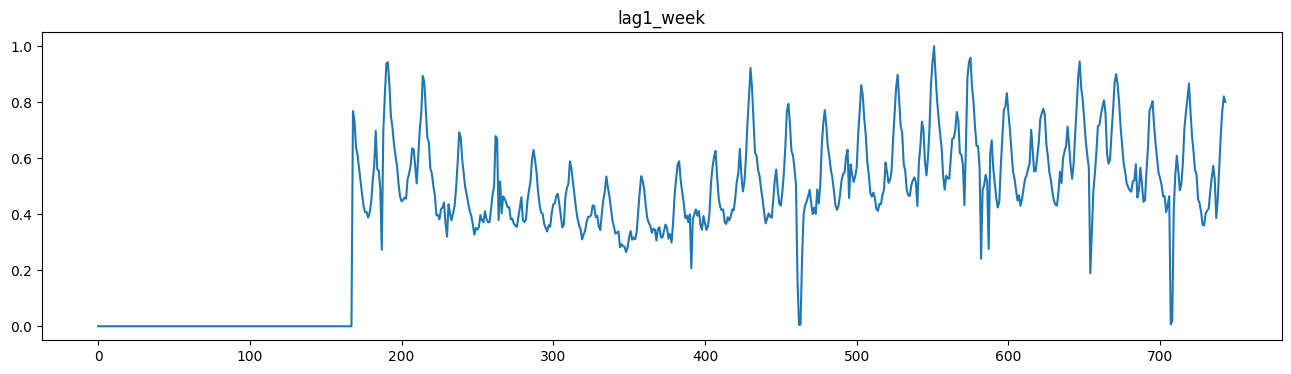

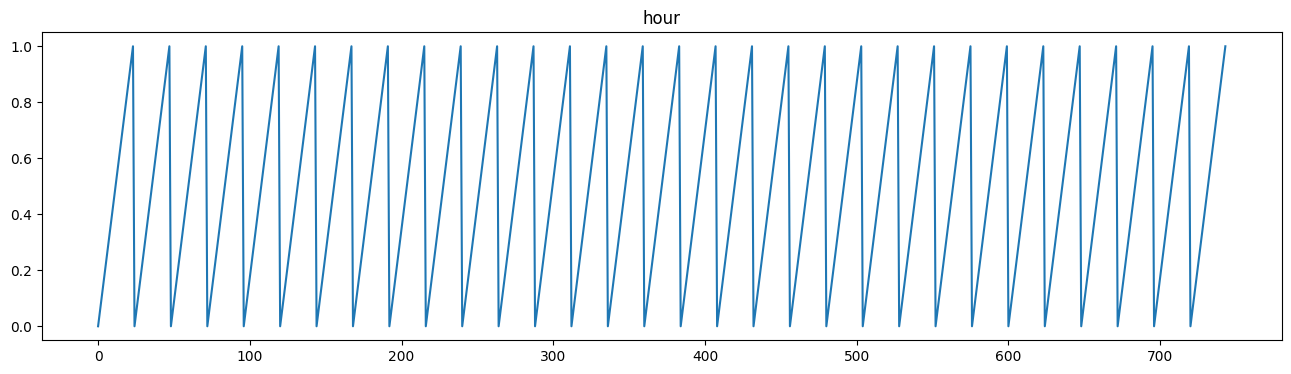

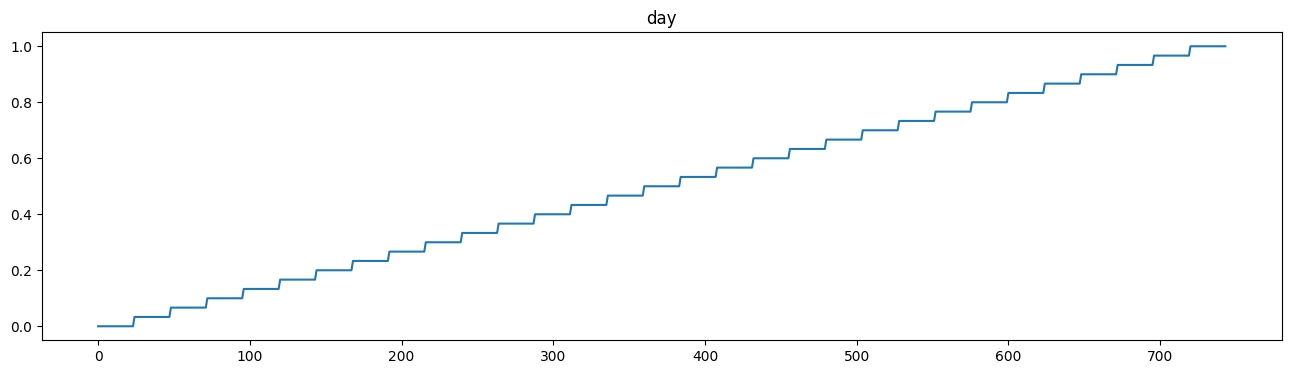

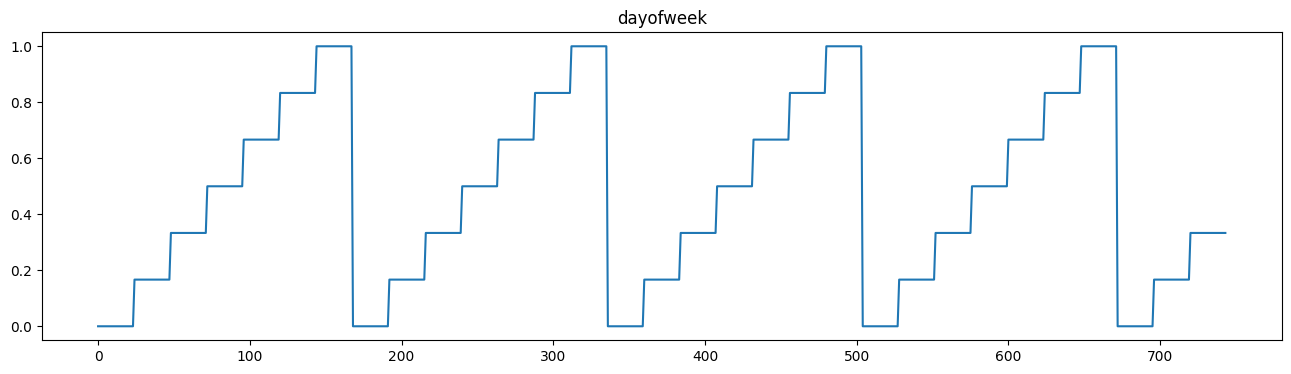

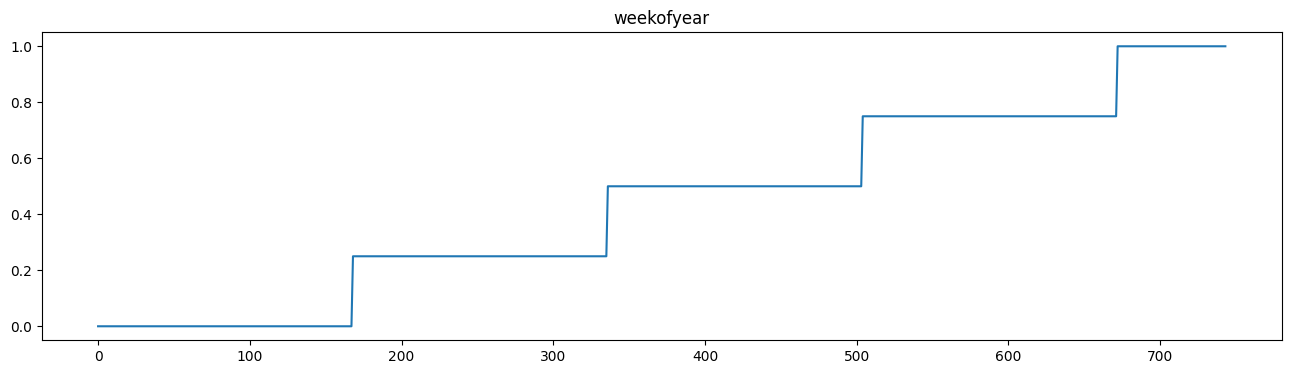

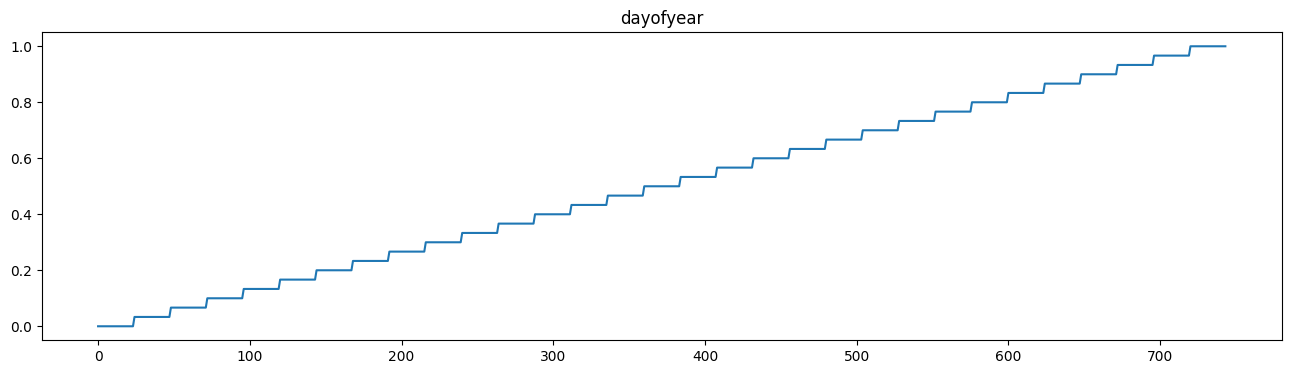

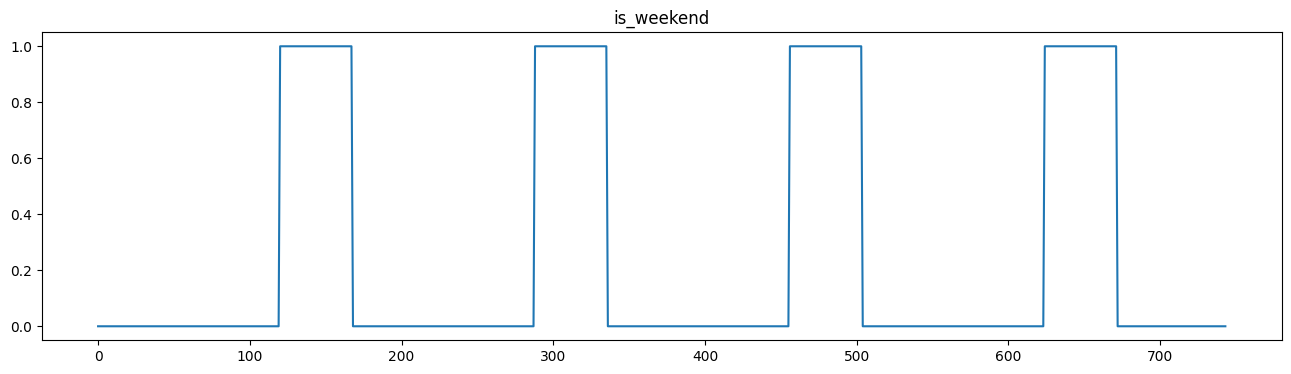

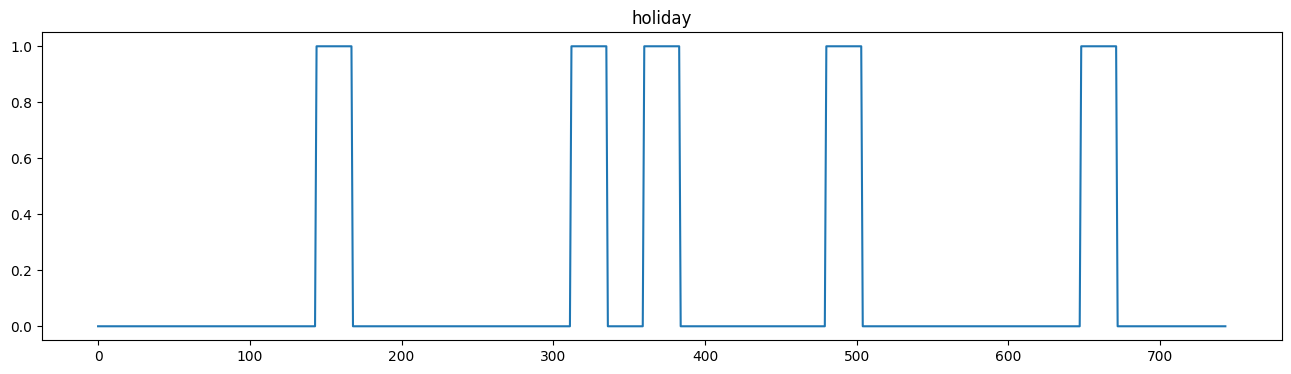

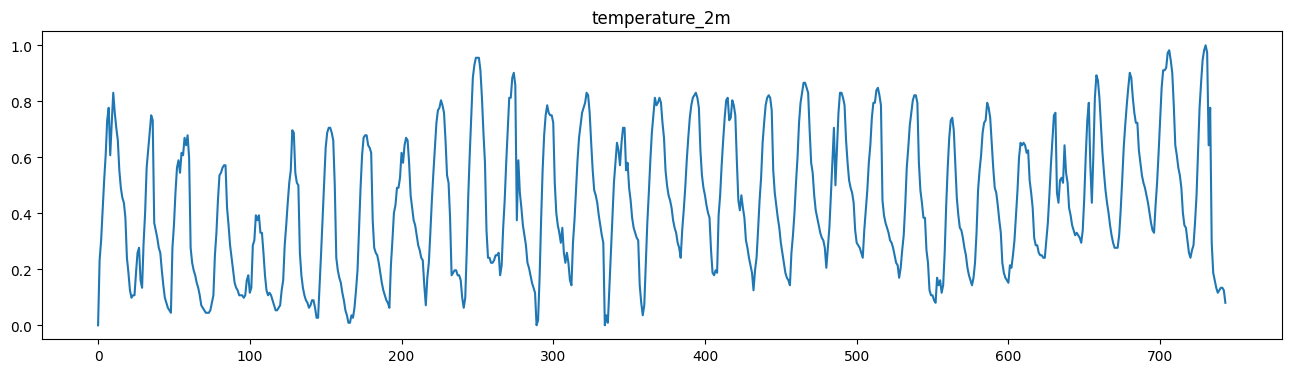

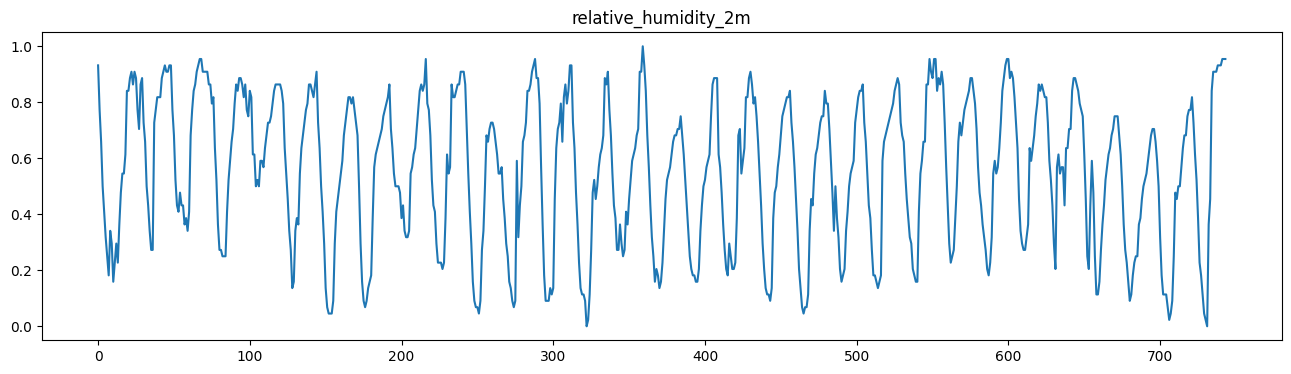

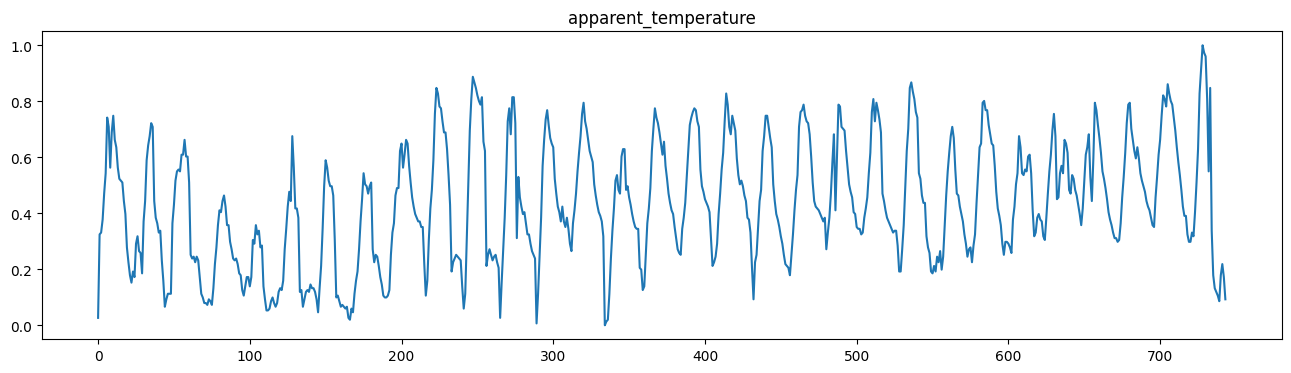

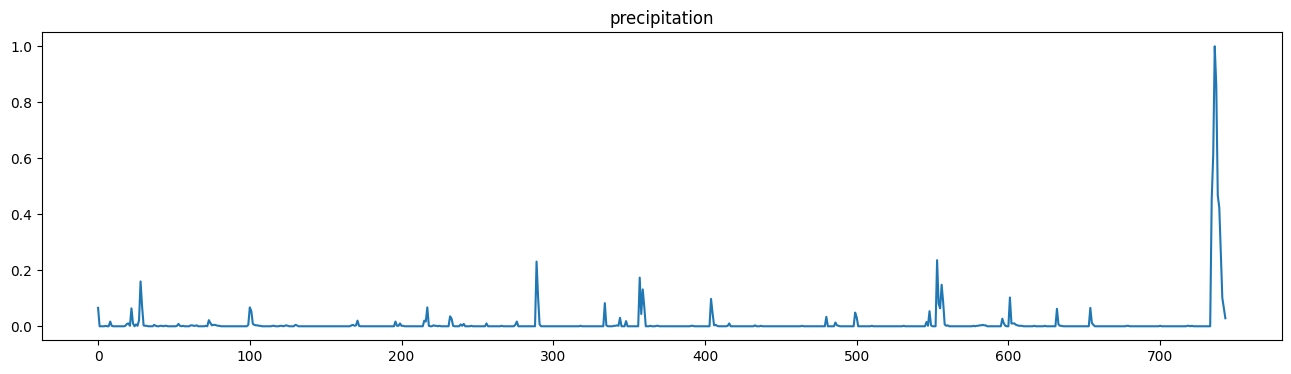

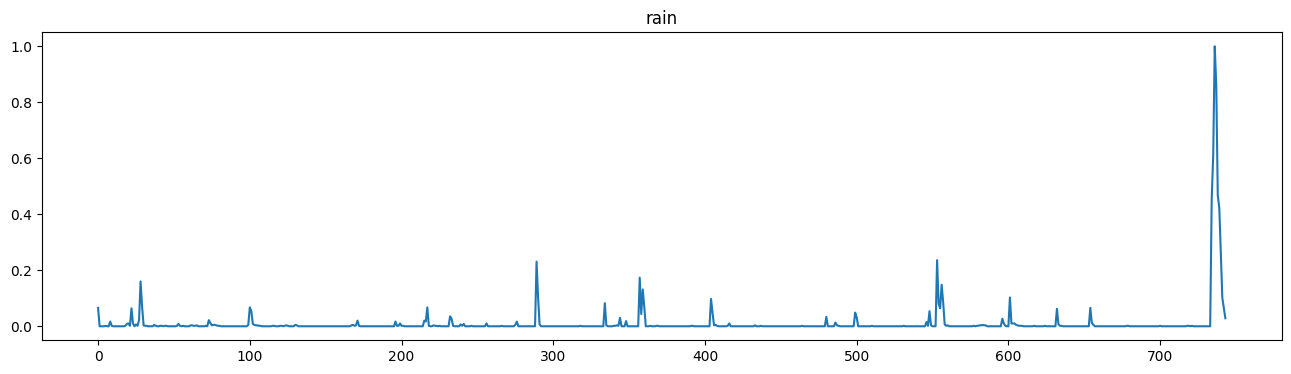

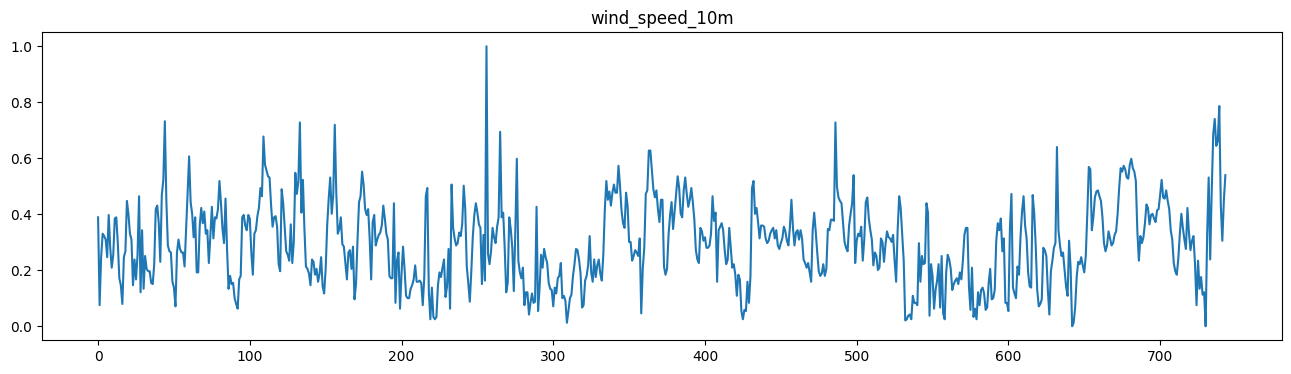

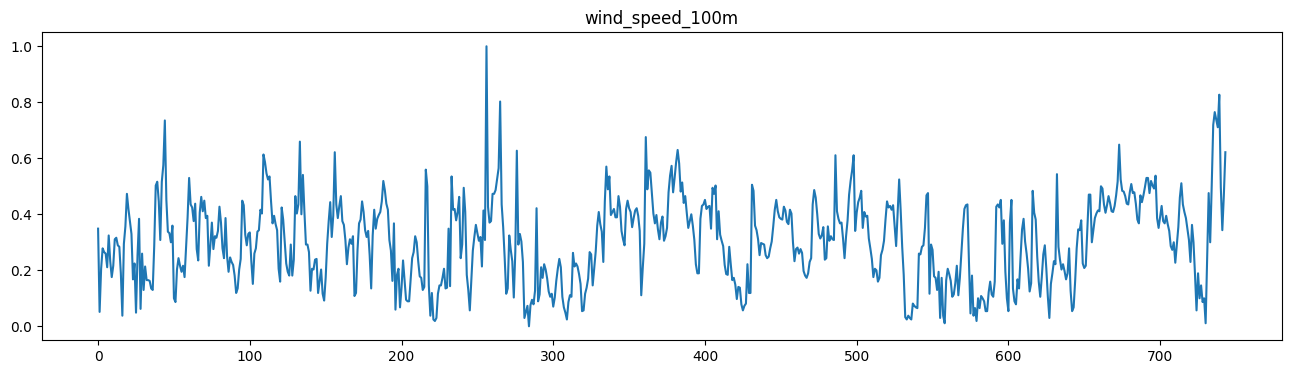

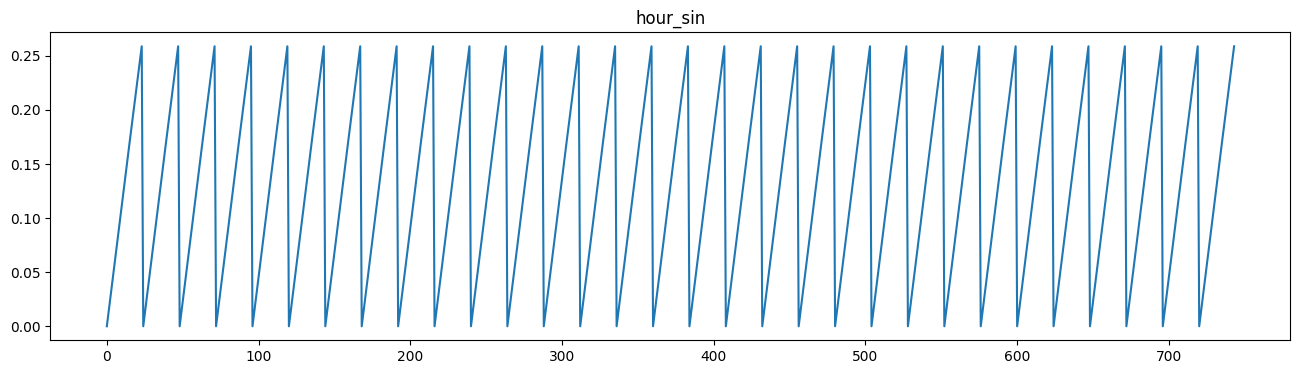

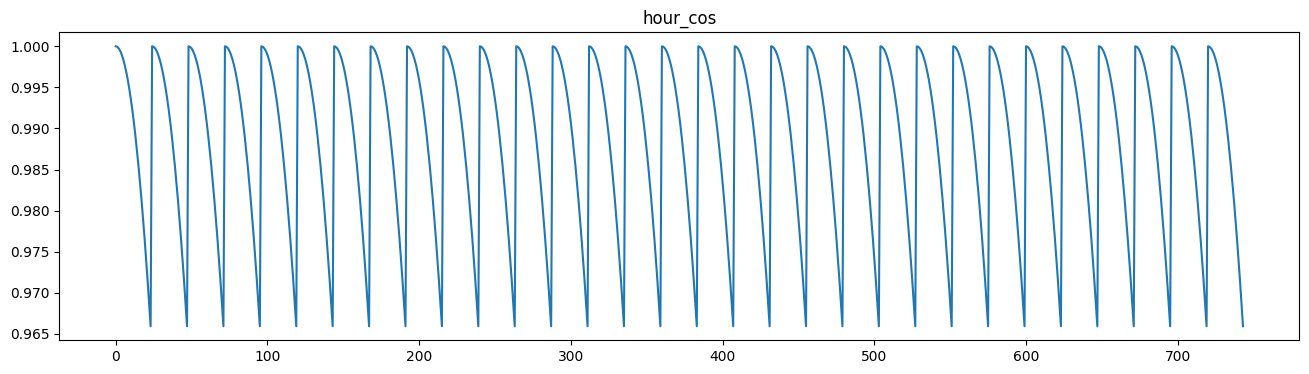

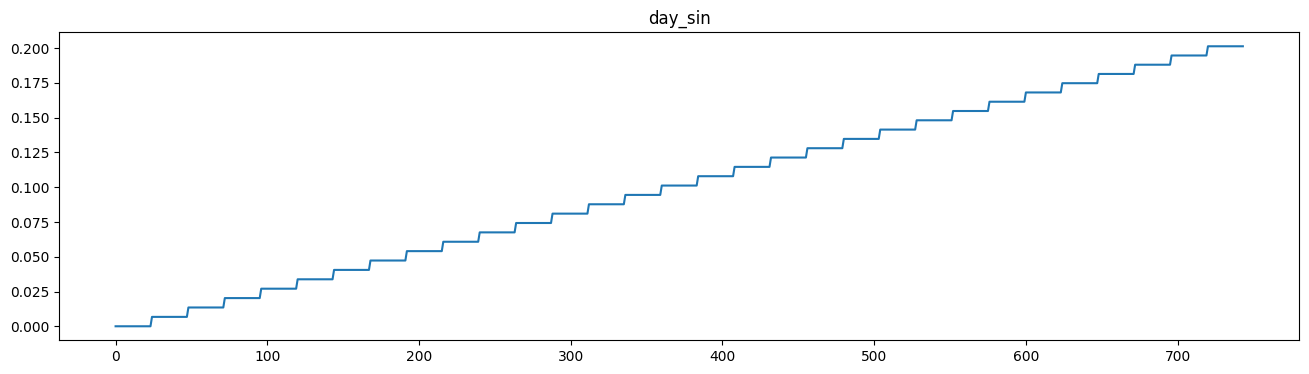

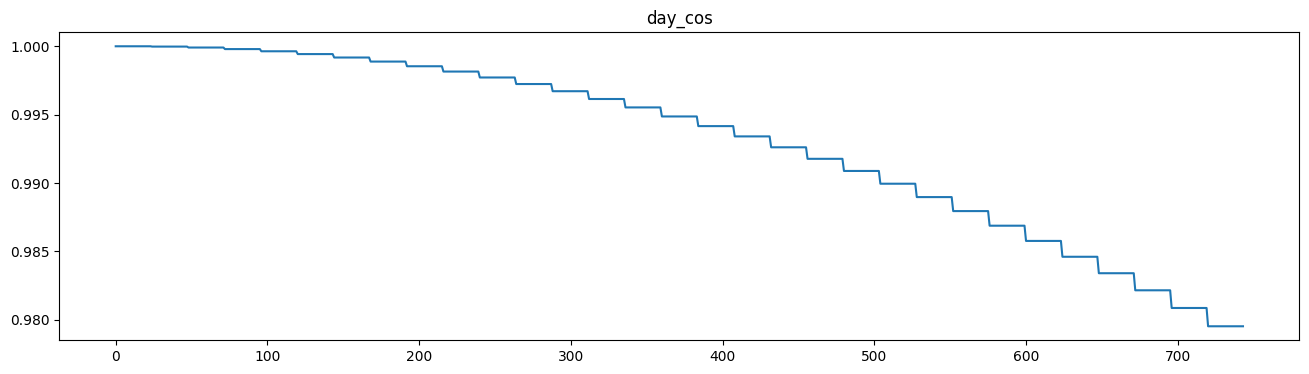

In [30]:
for col in df4 :#[["hour",'hour_sin', 'hour_cos',"day", 'day_sin', 'day_cos',]]:
    plt.figure(figsize=(16, 4))
    df4[col].plot(ax=plt.gca())  # This uses the current axes
    plt.title(col)
    plt.show()



Model Power Evaluation
Mean Squared Error (MSE): 0.01109297038067253
Mean Absolute Error (MAE): 0.05521165361659319
R-squared: 0.7057439417340075


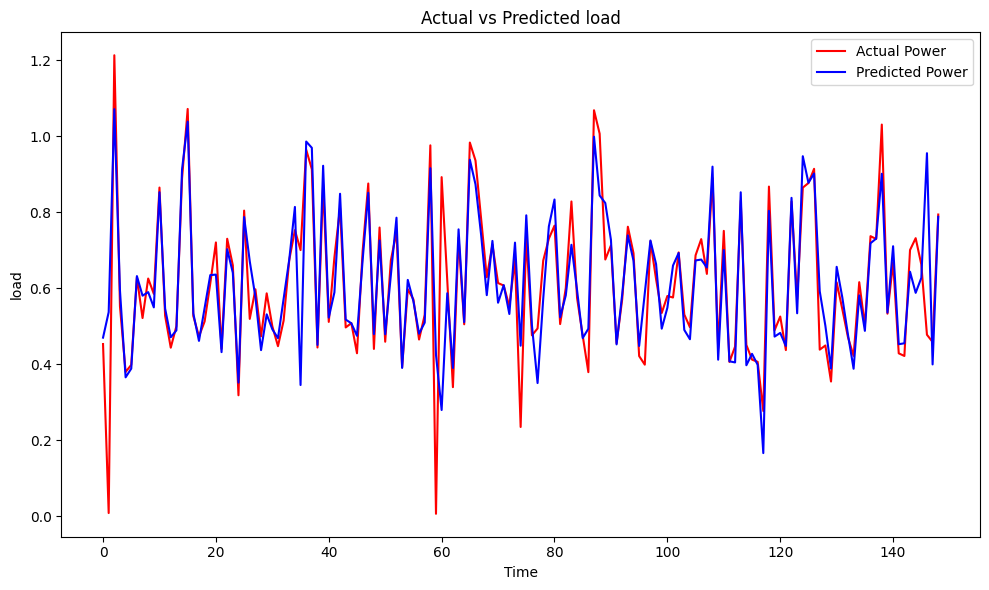

In [31]:
model = common_pipeline.model_trainer(df4)

In [32]:
label = df3.pop('Load_kW')
# df3
pca_df['Load_kW'] = label
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Load_kW
0,-5.8925,-3.9293,-1.9676,-0.6047,1.5551,0.1845,-0.9998,-2.5183,-1.6436,-0.3210,1.0404,0.1492,0.8709
1,-5.3211,-2.5376,-0.0288,-2.2133,-0.0520,-1.7937,0.9880,-2.5343,-2.4918,-0.1475,-0.1368,-0.2114,0.8313
2,-4.1980,-2.6780,-1.0601,-1.0779,-1.7055,-2.1582,0.5804,-2.8093,-3.1163,-0.5773,-0.7671,-0.4032,0.7231
3,-4.5049,-2.1473,-1.4540,-0.6515,-1.6356,-1.4237,0.4015,-2.7580,-3.0393,-0.4917,-1.0784,-0.1460,0.6937
4,-4.8919,-1.5141,-1.4161,-0.6994,-1.3210,-1.1594,0.4972,-2.6649,-2.9315,-0.3153,-1.2873,0.0452,0.6398
...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,5.7899,-2.8328,-7.0031,3.6211,5.0667,-0.2589,-0.2522,-0.0741,1.0739,-0.1215,0.1477,0.6589,0.6751
740,5.4333,-1.7980,-3.2711,0.8323,3.7120,-0.3783,-0.0945,0.2995,1.4362,0.3238,0.3349,0.2978,0.7478
741,5.4402,-1.1795,-0.6263,-0.8882,1.8220,0.3869,-0.3012,0.7743,2.0342,0.5156,0.5078,0.3202,0.7547
742,6.0526,-1.5729,-0.6118,-0.5777,0.9932,1.6794,-0.4604,1.0570,1.4161,0.3044,0.3442,0.3663,0.8495



Model Power Evaluation
Mean Squared Error (MSE): 0.006694469677686292
Mean Absolute Error (MAE): 0.04987442149163414
R-squared: 0.822420128068732


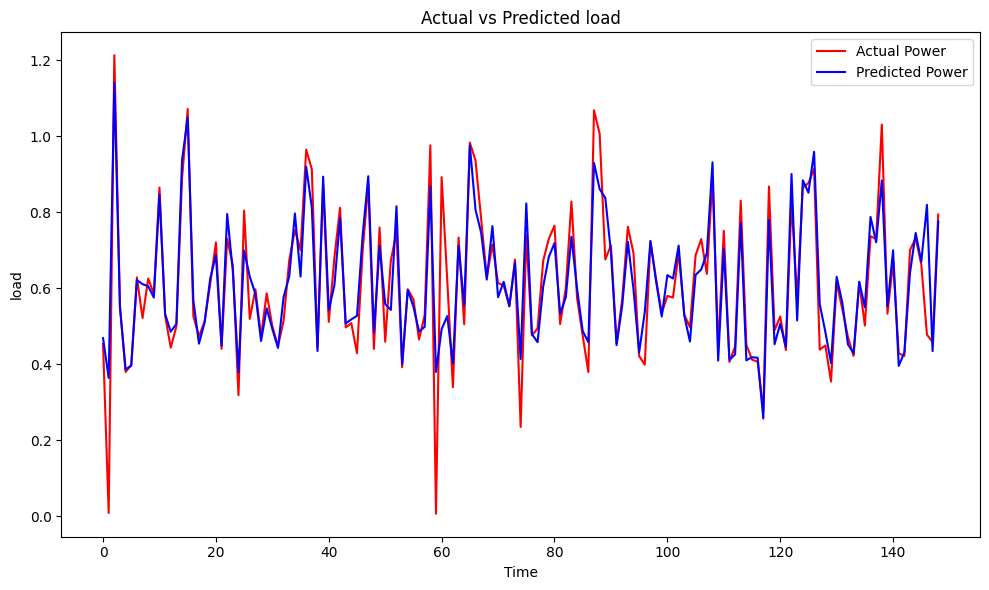

In [34]:
model2 = common_pipeline.model_trainer(pca_df)

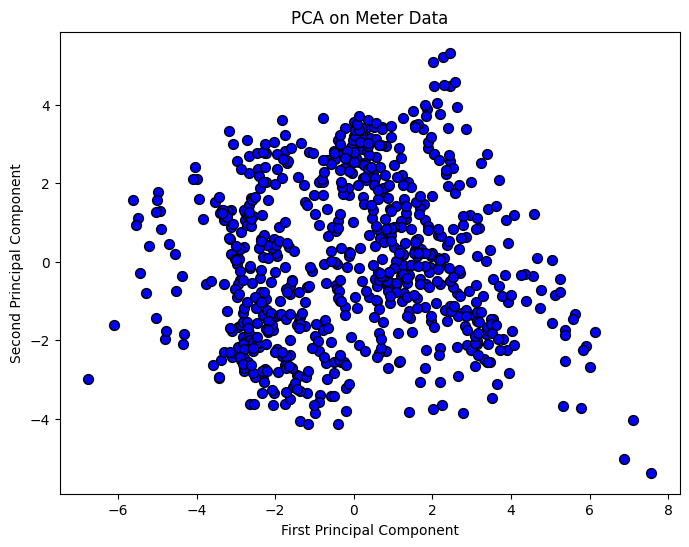

,PC1,PC2,Load_kW
0,-6.7648,-2.9976,0.8709
1,-6.0866,-1.6172,0.8313
2,-4.8106,-1.9706,0.7231
3,-5.0246,-1.4314,0.6937
4,-5.2796,-0.7965,0.6398
...,...,...,...
739,5.7814,-3.7134,0.6751
740,5.3648,-2.5256,0.7478
741,5.3791,-1.8582,0.7547
742,5.8273,-2.2452,0.8495


In [35]:
pca_df1 ,pca_result1 = common_pipeline.pca_function(df3,n_components=2)
common_pipeline.pca_plot(pca_result1)
pca_df1['Load_kW'] = label
pca_df1


Model Power Evaluation
Mean Squared Error (MSE): 0.016268127727860696
Mean Absolute Error (MAE): 0.09025120810364506
R-squared: 0.5684658863861705


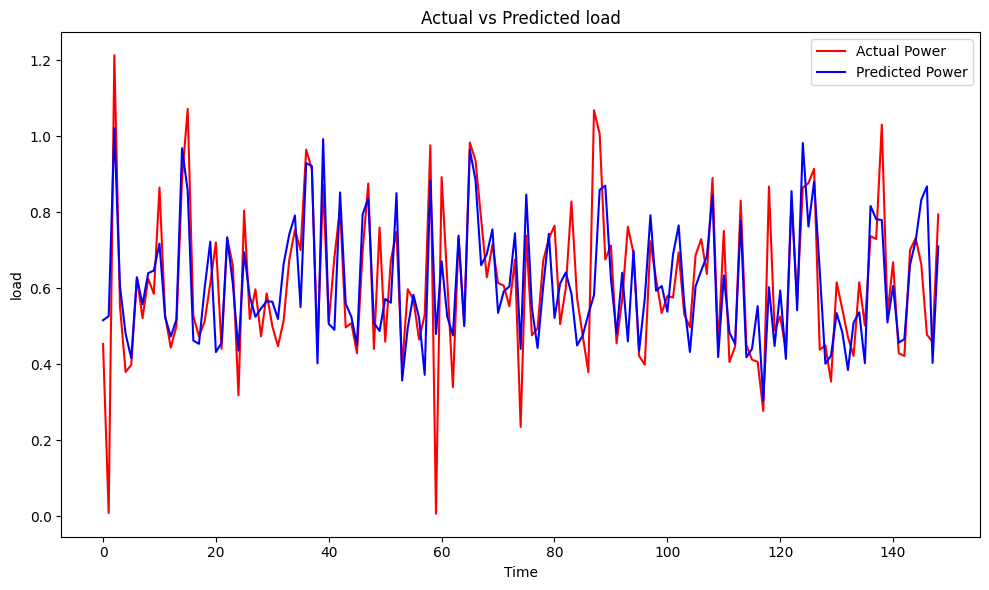

In [36]:
model3 = common_pipeline.model_trainer(pca_df1)